## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

from sklearn import metrics

## Get Data

In [2]:
# https://vuglar.com/ml/svm/penguins_train_set.csv
dataset_name = "penguins_train_set.csv"
penguin_set = pd.read_csv(dataset_name)

## Observe Data

In [3]:
penguin_set.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguin_set.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [5]:
penguin_set.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


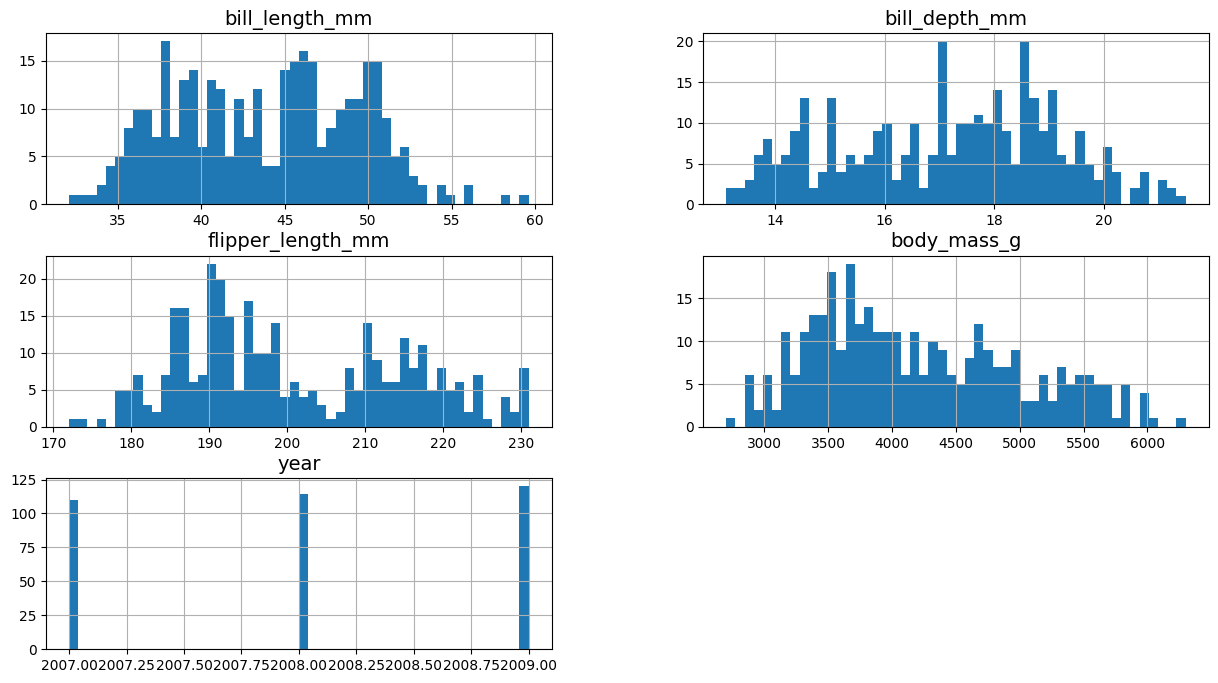

In [6]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

penguin_set.hist(bins=50, figsize=(15, 8))
# save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [7]:
penguin_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [8]:
penguin_set.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
penguin_set[["species", "island", "sex"]].value_counts()

species    island     sex   
Gentoo     Biscoe     male      61
                      female    58
Chinstrap  Dream      female    34
                      male      34
Adelie     Dream      male      28
                      female    27
           Torgersen  female    24
                      male      23
           Biscoe     female    22
                      male      22
Name: count, dtype: int64

In [10]:
penguin_set["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [11]:
penguin_set["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [12]:
penguin_set["sex"].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

### Convet Categories To Codes

In [13]:
# train_set["species"] = pd.Categorical(train_set["species"])
penguin_set["species"] = penguin_set.species.astype('category')
penguin_set["species"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 344 entries, 0 to 343
Series name: species
Non-Null Count  Dtype   
--------------  -----   
344 non-null    category
dtypes: category(1)
memory usage: 608.0 bytes


In [14]:
cat = pd.Categorical(penguin_set["species"])
penguin_set["test"] = cat.codes
penguin_set.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,test
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0


In [15]:
penguin_set["species"].astype('category')
penguin_set.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,test
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0


In [16]:
# corr_matrix = penguin_set.corr(numeric_only=True)
# corr_matrix["species"].sort_values(ascending=False)

## Clean Data

### Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

num_attributes = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "year"]
cat_attribs = ["island"]

penguin_set = penguin_set.dropna(subset='sex')
penguin_set["sex_e"] = preprocessing.LabelEncoder().fit_transform(penguin_set.sex)
penguin_set["species_l"] = preprocessing.LabelEncoder().fit_transform(penguin_set.species)

# Pipeline p. 70
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attribs),
])

penguins_prepared = full_pipeline.fit_transform(penguin_set)

In [18]:
cols = full_pipeline.get_feature_names_out()

In [19]:
df_penguins_prepared = pd.DataFrame(
    penguins_prepared, columns=cols,
    index=penguin_set.index)
df_penguins_prepared["sex"] = penguin_set["sex_e"]
df_penguins_prepared["species"] = penguin_set["species_l"]

In [20]:
df_penguins_prepared.head()

,num__bill_length_mm,num__bill_depth_mm,num__flipper_length_mm,num__body_mass_g,num__year,cat__island_Biscoe,cat__island_Dream,cat__island_Torgersen,sex,species
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742,0.0,0.0,1.0,1,0
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742,0.0,0.0,1.0,0,0
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742,0.0,0.0,1.0,0,0
4,-1.335566,1.085877,-0.569284,-0.941606,-1.283742,0.0,0.0,1.0,0,0
5,-0.859415,1.747026,-0.783651,-0.692852,-1.283742,0.0,0.0,1.0,1,0


In [21]:
corr_matrix = df_penguins_prepared.corr(numeric_only=True)
# corr_matrix["species"].sort_values(ascending=False)
corr_matrix["species"].sort_values(ascending=False)

species                   1.000000
num__flipper_length_mm    0.850737
num__body_mass_g          0.750434
num__bill_length_mm       0.730548
cat__island_Biscoe        0.596528
sex                       0.010964
num__year                 0.004727
cat__island_Dream        -0.315364
cat__island_Torgersen    -0.419318
num__bill_depth_mm       -0.740346
Name: species, dtype: float64

In [22]:
train_data = df_penguins_prepared[["num__bill_length_mm", "num__bill_depth_mm"]]
train_label_data = df_penguins_prepared["species"]

# Train Models

In [23]:
from sklearn.model_selection import GridSearchCV

## Linear SVC

### Grid Search CV

In [69]:
from sklearn.svm import LinearSVC

param_grid = {
    'C': [0.001, 1.0, 50.0, 100.0],
}

svc = LinearSVC(dual="auto")

grid_search = GridSearchCV(svc, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(train_data, train_label_data)

GridSearchCV(cv=5, estimator=LinearSVC(dual='auto'),
             param_grid={'C': [0.001, 1.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'C': 50.0}

### Train Model

In [60]:
linear_svc = LinearSVC(dual="auto", C=50.0)
linear_svc.fit(train_data, train_label_data)

LinearSVC(C=50.0, dual='auto')

In [27]:
svc_linear_score = linear_svc.score(train_data, train_label_data)
svc_linear_score

0.954954954954955

### Default Parameters

In [28]:
svc_linear_default = LinearSVC(dual="auto")
svc_linear_default.fit(train_data, train_label_data)

LinearSVC(dual='auto')

## Polynomial SVC

### Grid Search CV

In [29]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 1.0, 50.0, 100.0],
    'degree' : [3, 4]
}

svc = SVC(kernel="poly")

grid_search = GridSearchCV(svc, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(train_data, train_label_data)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 1.0, 50.0, 100.0], 'coef0': [0, 1, 5],
                         'degree': [3, 4]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_

{'C': 100.0, 'coef0': 0, 'degree': 3}

### Train Model

In [61]:
poly_svc = SVC(kernel="poly", C=100.0, degree=3)
poly_svc.fit(train_data, train_label_data)

SVC(C=100.0, kernel='poly')

In [32]:
svc_poly_score = poly_svc.score(train_data, train_label_data)
svc_poly_score

0.975975975975976

In [33]:
poly_svc_default = SVC(kernel="poly")
poly_svc_default.fit(train_data, train_label_data)

SVC(kernel='poly')

## Gaussian RBF

### Grid Search CV

In [34]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 1.0, 50.0, 100.0],
    'gamma' : ['scale', 'auto']
}

svc = SVC(kernel="rbf")

grid_search = GridSearchCV(svc, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(train_data, train_label_data)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 1.0, 50.0, 100.0],
                         'gamma': ['scale', 'auto']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'C': 100.0, 'gamma': 'scale'}

### Train Model

In [36]:
rbf_svc = SVC(kernel="rbf", C=100.0, gamma="scale")
rbf_svc.fit(train_data, train_label_data)

SVC(C=100.0)

In [37]:
svc_rbf_score = rbf_svc.score(train_data, train_label_data)
svc_rbf_score

0.978978978978979

In [38]:
rbf_svc_default = SVC(kernel="rbf")
rbf_svc_default.fit(train_data, train_label_data)

SVC()

In [39]:
print(svc_linear_score, svc_poly_score, svc_rbf_score)

0.954954954954955 0.975975975975976 0.978978978978979


# Visualizations

In [40]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Create this plot six times with the six different combinations of numerical features (Select Best One)

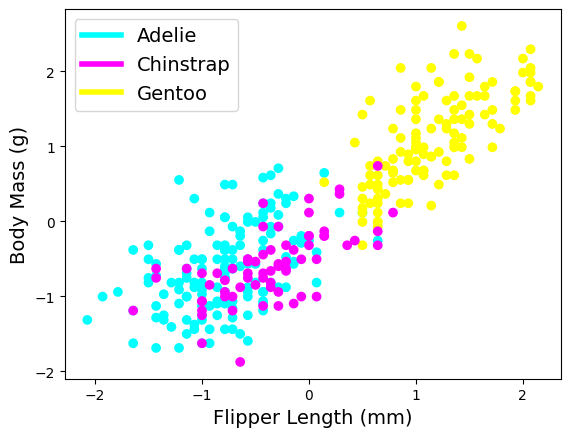

In [41]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__flipper_length_mm"], df_penguins_prepared["num__body_mass_g"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

species_categories = df_penguins_prepared["species"].unique()

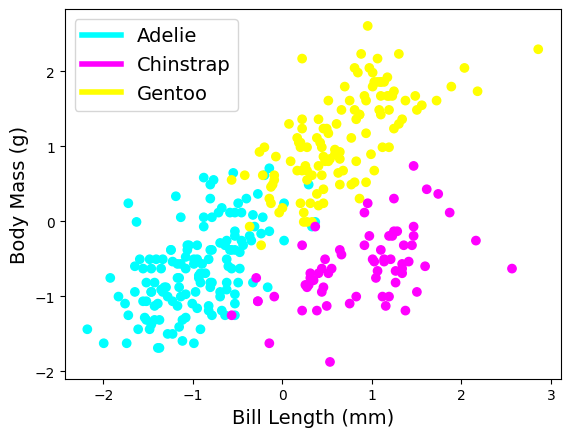

In [42]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_length_mm"], df_penguins_prepared["num__body_mass_g"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")

species_categories = df_penguins_prepared["species"].unique()

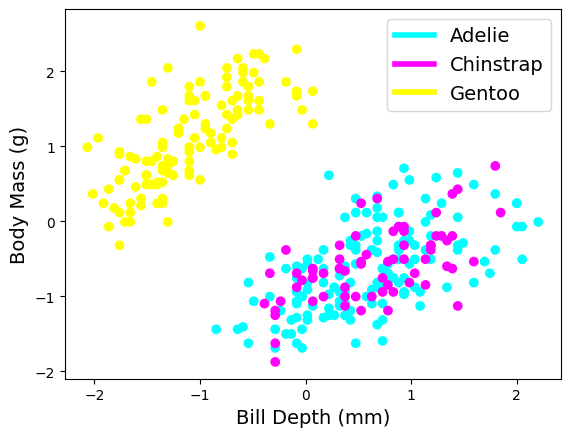

In [43]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_depth_mm"], df_penguins_prepared["num__body_mass_g"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Body Mass (g)")

species_categories = df_penguins_prepared["species"].unique()

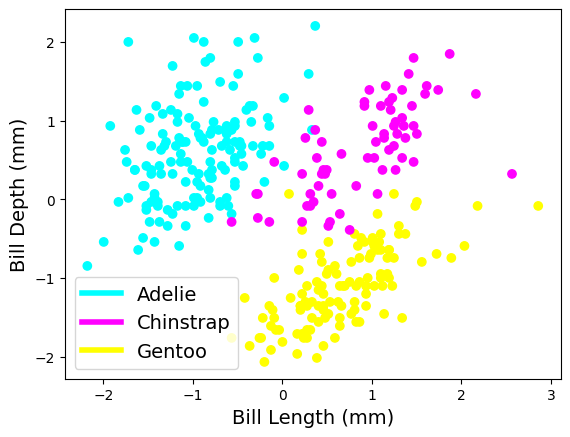

In [44]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_length_mm"], df_penguins_prepared["num__bill_depth_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

species_categories = df_penguins_prepared["species"].unique()

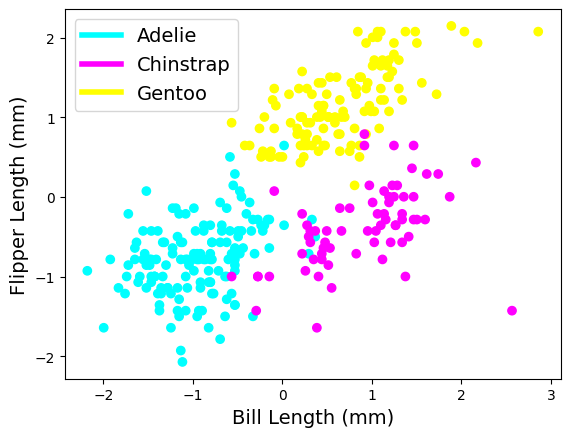

In [45]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_length_mm"], df_penguins_prepared["num__flipper_length_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")

species_categories = df_penguins_prepared["species"].unique()

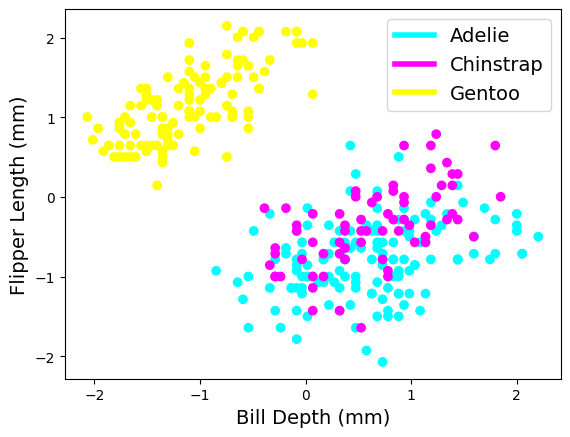

In [46]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.lines import Line2D

# cmap = plt.get_cmap('viridis')

custom_lines = [Line2D([0], [0], color="cyan", lw=4),
                Line2D([0], [0], color="magenta", lw=4),
                Line2D([0], [0], color="yellow", lw=4)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_depth_mm"], df_penguins_prepared["num__flipper_length_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")

species_categories = df_penguins_prepared["species"].unique()

### Cross Validation Scores

In [47]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
# evaluate model
scores = cross_val_score(linear_svc, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.949 (0.037)


In [48]:
# evaluate model
scores = cross_val_score(poly_svc, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.969 (0.027)


In [49]:
# evaluate model
scores = cross_val_score(rbf_svc, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.956 (0.032)


#### Default Models

In [50]:
# evaluate model
scores = cross_val_score(svc_linear_default, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.949 (0.037)


In [51]:
# evaluate model
scores = cross_val_score(poly_svc_default, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.903 (0.037)


In [52]:
# evaluate model
scores = cross_val_score(rbf_svc_default, train_data, train_label_data, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.960 (0.029)


### Confusion Matrices

In [53]:
linear_predictions = linear_svc.predict(train_data)
poly_predictions = poly_svc.predict(train_data)
rbf_predictions = rbf_svc.predict(train_data)

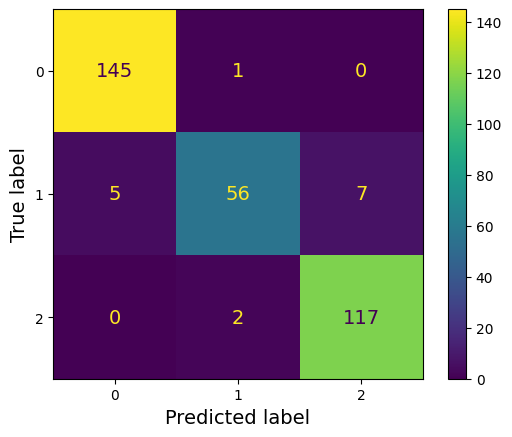

In [54]:
# This is only on training data
confusion_matrix = metrics.confusion_matrix(train_label_data, linear_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() # Looks good but that is because this is predicting on the same data it trained on

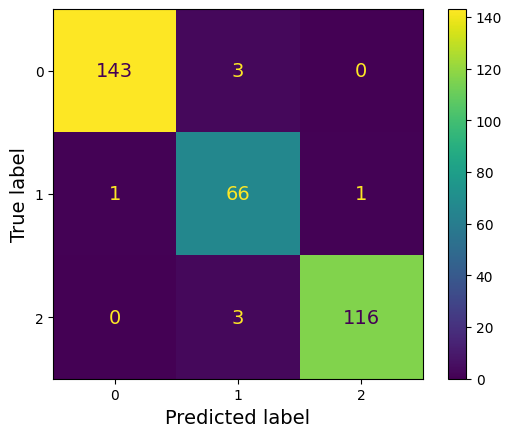

In [55]:
# This is only on training data
confusion_matrix = metrics.confusion_matrix(train_label_data, poly_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() # Looks good but that is because this is predicting on the same data it trained on

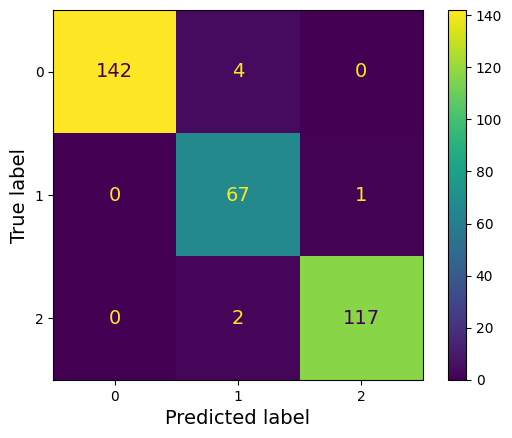

In [56]:
# This is only on training data
confusion_matrix = metrics.confusion_matrix(train_label_data, rbf_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() # Looks good but that is because this is predicting on the same data it trained on

## Observing Decision Boundaries

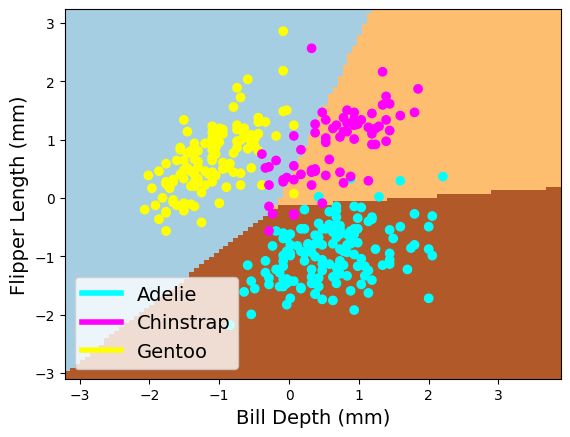

In [83]:
# fpr, tpr, thresholds = roc_curve(train_label_data, y_scores)
from sklearn.inspection import DecisionBoundaryDisplay

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    linear_svc,
    train_data,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_depth_mm"], df_penguins_prepared["num__bill_length_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")

plt.savefig('decision_linear_tuned.png')

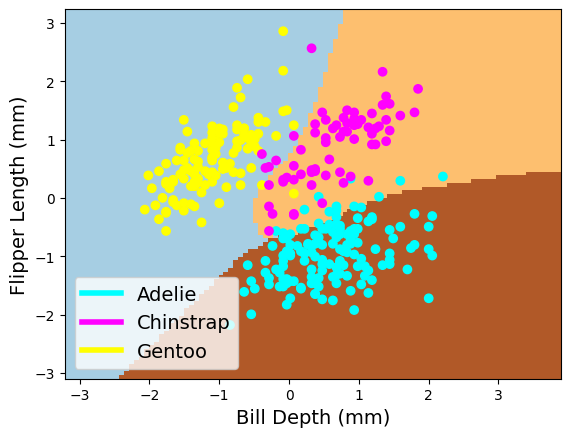

In [84]:
# fpr, tpr, thresholds = roc_curve(train_label_data, y_scores)
from sklearn.inspection import DecisionBoundaryDisplay

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    poly_svc,
    train_data,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_depth_mm"], df_penguins_prepared["num__bill_length_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")

plt.savefig('decision_poly_tuned.png')

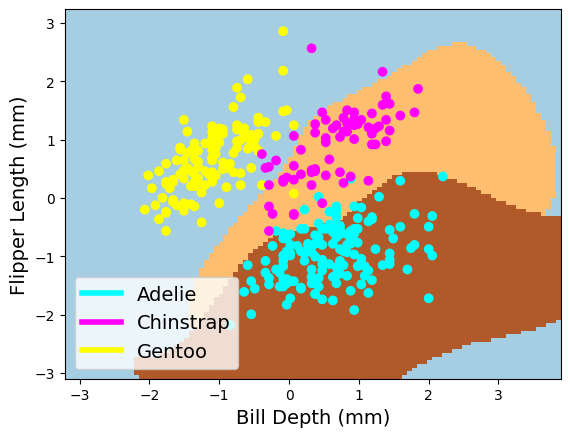

In [85]:
# fpr, tpr, thresholds = roc_curve(train_label_data, y_scores)
from sklearn.inspection import DecisionBoundaryDisplay

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    rbf_svc,
    train_data,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

colors = {0:'cyan', 1:'magenta', 2:'yellow'}

human_readable_categories = penguin_set["species"].unique()
ax.scatter(df_penguins_prepared["num__bill_depth_mm"], df_penguins_prepared["num__bill_length_mm"], c=df_penguins_prepared["species"].map(colors))
ax.legend(custom_lines, [human_readable_categories[0], human_readable_categories[2], human_readable_categories[1]])
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")

plt.savefig('decision_rbf_tuned.png')